<a href="https://colab.research.google.com/github/vaishnavikondaparthy/MachineLearning/blob/main/3.2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Loss Function

In optimization, a loss function, also known as a cost function, is a measure of how well a model performs on a dataset. It quantifies the difference between the predicted values of the model and the actual ground truth values in the training data.

The primary goal of training a machine learning model is to minimize this loss function, as doing so leads to the model making more accurate predictions. The choice of the loss function depends on the type of problem being addressed (e.g., regression, classification) and the characteristics of the data.

In [1]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Example usage:
true_labels = np.array([2, 4, 5, 4, 6])
predicted_labels = np.array([2.5, 3.5, 4.5, 4, 5.5])

mse = mean_squared_error(true_labels, predicted_labels)
rmse = root_mean_squared_error(true_labels, predicted_labels)
mae = mean_absolute_error(true_labels, predicted_labels)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.2
Root Mean Squared Error: 0.4472135954999579
Mean Absolute Error: 0.4


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') #styles that allow you to customize the appearance of your plots easily.

In [3]:
import numpy as np
import plotly.graph_objs as go #graph_objs--> create and manipulate various types of plotly graph objects programmatically.

# Generating random data
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)

# Create a scatter plot
scatter = go.Scatter(x=x, y=y, mode='markers')

# Create layout
layout = go.Layout(title='Interactive Scatter Plot', xaxis=dict(title='X-axis'), yaxis=dict(title='Y-axis'))

# Create figure
fig = go.Figure(data=[scatter], layout=layout)

# Display interactive plot
fig.show()

## 1. Regression

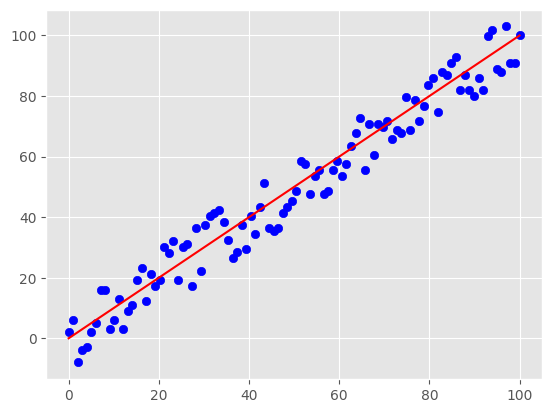

In [4]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100) # generates 100 evenly spaced points between 0 and 100. This will be used as the independent variable x.
y_actual = np.copy(x)  #np.copy(x) creates a copy of the x array, which is assigned to y_actual. This makes y_actual a perfect straight line since it's identical to x.
y_pred = x + np.random.randint(-10,10,100) #np.random.randint(-10, 10, 100) generates an array of 100 random integers between -10 and 10. This array is added element-wise to x, resulting in y_pred. This introduces random noise to the perfect straight line.

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

## Mean Squared Error:

## $MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

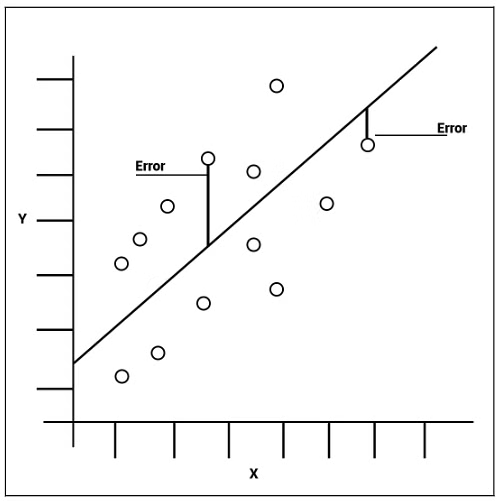

 Changing the units of error to be the same as the data, so we use Root Mean Squared Error instead. It is refered to as L2 loss.

In [5]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [6]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

## 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, pictures of cats and dogs, and the corresponding labels assigned to those images. Training a model that can predict a label for some input image belonging to either label class (cat or dog).

In [7]:
import numpy as np

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # Small value to avoid numerical instability (log(0))
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) #binary classfication loss is also called as Binary log loss.
    return np.mean(loss)

# Example usage:
y_true = np.array([1, 0, 1, 0, 1])  # True labels
y_pred = np.array([0.9, 0.1, 0.8, 0.2, 0.7])  # Predicted probabilities
print("Binary Cross-Entropy Loss:", binary_cross_entropy(y_true, y_pred))


Binary Cross-Entropy Loss: 0.20273661557656092


The formula for binary cross entropy is:

$L = - (y * log(p) + (1 - y) * log(1 - p))$

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.



In [8]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [9]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [10]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
#To use the pd.get_dummies() function to create dummy variables from a Pandas DataFrame df
  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [11]:
#This code assumes that train and test are the training and testing dataframes, respectively.
#The drop() function is used to remove the 'Item_Outlet_Sales' column from the dataframes
#the remaining columns are stored in the x_train and x_test variables. The 'Item_Outlet_Sales' column is stored in the y_train and y_test variables.

train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [13]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

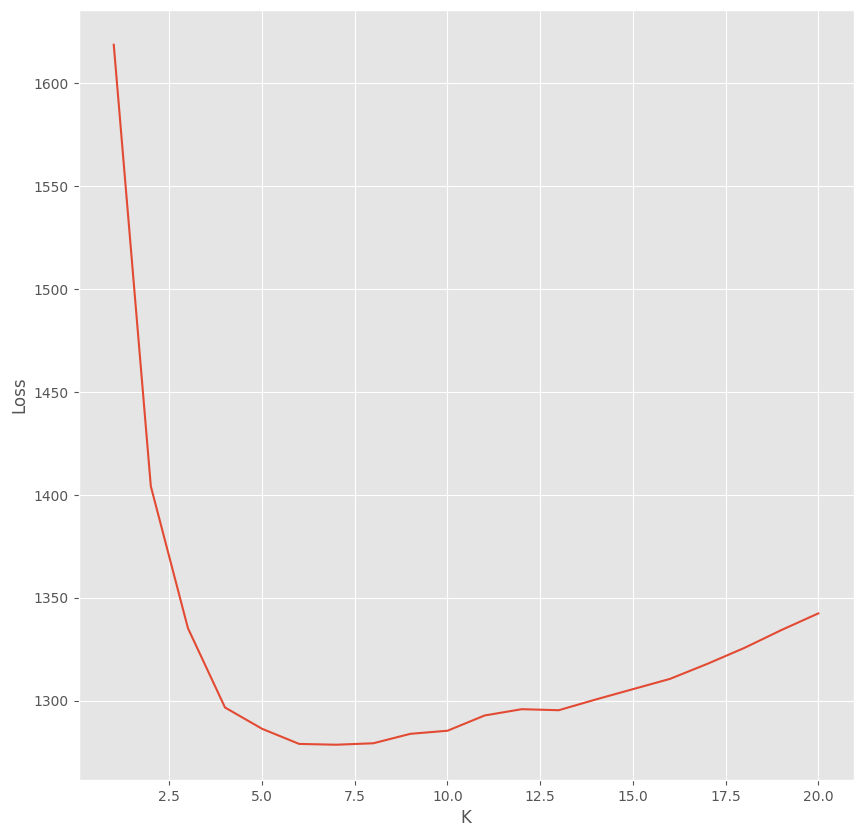

Minimum error 1278.5816281094171 is at k = 6


In [14]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))


## Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

### The calculation of loss function that MSE(Mean Squared Error) using KNN regression model

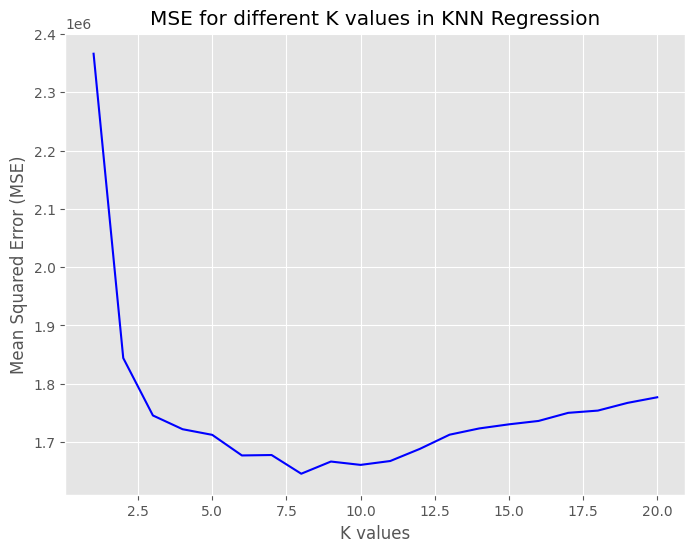

Mean Squared error: 1776837.4265371317
Minimum error 1645667.460942505 is at k = 7


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

# Initialize lists to store MSE values and corresponding k values
mse_values = []
k_values = list(range(1, 21))  # Try k values from 1 to 20

# Loop through different values of k
for k in k_values:
    # Initialize KNN regression model for each k
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model on training data
    knn_model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(x_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Store MSE value for each k
    mse_values.append(mse)

# Plotting MSE values for different k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values, linestyle='-', color='b')
plt.xlabel('K values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for different K values in KNN Regression')
plt.grid(True)
plt.show()
print("Mean Squared error:",mse)
print("Minimum error {} is at k = {}".format(np.min(mse_values),np.argmin(mse_values)))

### The calculation of loss function that MAE(Mean Absolute Error) using KNN regression model

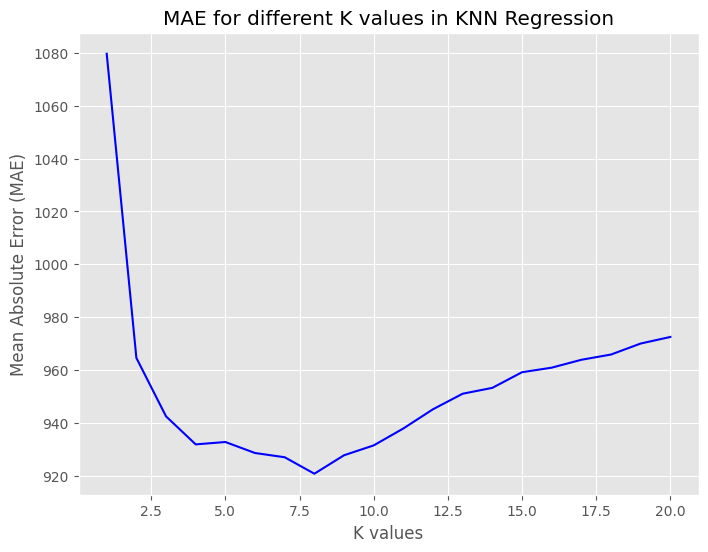

Mean Absolute Error 972.4886070614525
Minimum error 920.6900923743017 is at k = 7


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Initialize lists to store MAE values and corresponding k values
mae_values = []
k_values = list(range(1, 21))  # Try k values from 1 to 20

# Loop through different values of k
for k in k_values:
    # Initialize KNN regression model for each k
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model on training data
    knn_model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(x_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Store MAE value for each k
    mae_values.append(mae)

# Plotting MAE values for different k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mae_values, linestyle='-', color='b')
plt.xlabel('K values')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for different K values in KNN Regression')
plt.grid(True)
plt.show()
print("Mean Absolute Error",mae)
print("Minimum error {} is at k = {}".format(np.min(mae_values),np.argmin(mae_values)))

By the above analysis of the Loss fuctions on the KNN regression model
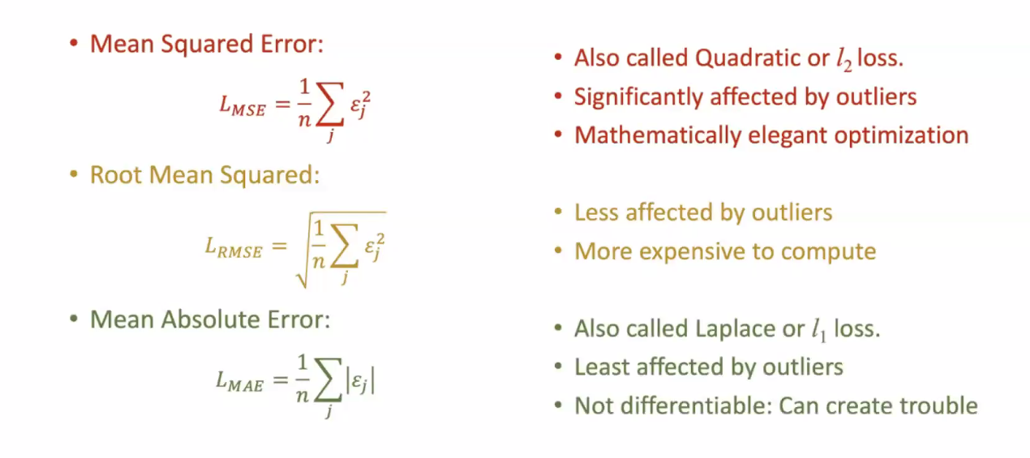


 Seeing the above value, concluding that the MSE value is more compare to the other two loss function since they consider the outliers as well which is a drawback in MSE loss function. Althought the RMSE isless compare to the MAE, considering the MAE, the loss function is least effected.
